# Exploring sentiment in Tweets
We collected tweets from multiple datasets. To examing the sentiment present in the tweets we wanted to use a different method of sentiment analysis since TextBlob did not provide much information

## Part 1: Importing necessary libraries and data

In [35]:
import pandas as pd
aids_data = pd.read_csv('vaccinescauseaids_twitter_data.csv')
kill_data = pd.read_csv('vaccineskill_twitter_data.csv')
vaccinesAutism_data = pd.read_csv('vaccinescauseautism_twitter_data.csv', lineterminator='\n')
poison_data = pd.read_csv('vaccinesarepoison_twitter_data.csv')

merged_data = pd.concat([aids_data, kill_data, poison_data, vaccinesAutism_data], ignore_index = True)

In [36]:
merged_data # our merged data 

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,AdamYoung329,"Married, Father to two boys, huskies Nekola an...","Welland, Ontario",535,296,8577,2011-10-14 23:22:07,2020-09-21 02:47:57,86,"If I thought COVID was fake, killed nobody, an...",[]
1,LandonCraigie,Extremely muscular. Live in a remote castle wi...,Canada,4994,1745,8619,2017-05-05 02:04:03,2020-09-21 02:42:17,86,"If I thought COVID was fake, killed nobody, an...",[]
2,drhoctor2,Everything that hasn't killed me has made me M...,"Southern Tier, NY",4740,3275,326202,2009-03-27 15:53:23,2020-09-21 00:11:58,86,"If I thought COVID was fake, killed nobody, an...",[]
3,DanaSmithTN04,Is some sanity really all that big of an ask?,NaN,161,113,1928,2020-08-19 23:45:18,2020-09-20 22:54:21,86,"If I thought COVID was fake, killed nobody, an...",[]
4,PersistentObsvr,“I despise Trump with the intensity of a thous...,"Indianapolis, IN",5001,2368,61303,2017-11-06 02:21:59,2020-09-20 21:08:11,86,"If I thought COVID was fake, killed nobody, an...",[]
...,...,...,...,...,...,...,...,...,...,...,...
1443,Tonya42676876,"Don’t be a 🐑 but a truth seeker, The truth doe...",NaN,28,15,1944,2019-04-26 17:18:44,2020-09-13 01:09:22,0,"@fairness2all @Kingdom49867884 One more thing,...",[]
1444,soulutionaries,Soulutionaries TV Network is A Growing Army Of...,"London, England",507,589,3547,2016-10-28 01:29:58,2020-09-13 01:01:43,6,NEW TRENDING BRIT SONG! BLAST FAR &amp; WIDE E...,[]
1445,truthseeker6761,"""We the People are the Rightful Masters of bot...",NaN,330,2264,293247,2017-07-14 20:22:11,2020-09-12 23:11:58,1,@truthseeker6761 @BradleeDean1 They are trying...,[]
1446,CommonS18215823,NaN,NaN,278,25,345,2020-04-02 05:00:56,2020-09-12 23:02:23,1,@truthseeker6761 @BradleeDean1 They are trying...,[]


In [61]:
# download necessary libraries
from nrclex import NRCLex
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andreamock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Part 2: Examining how NRCLex works

In [62]:
#Instantiate text object 
text_object = NRCLex('aids are fun')

#Return words list.
text_object.words

['aids', 'are', 'fun']

In [63]:
text_object.affect_frequencies # example classification

{'fear': 0.0,
 'anger': 0.0,
 'anticip': 0.14285714285714285,
 'trust': 0.14285714285714285,
 'surprise': 0.0,
 'positive': 0.14285714285714285,
 'negative': 0.14285714285714285,
 'sadness': 0.14285714285714285,
 'disgust': 0.14285714285714285,
 'joy': 0.14285714285714285}

## Part 3: Performing NRCLex analysis on our data

In [41]:
# create dataframe which safe the analysis for each tweet

info_df = []
for tweet in merged_data['text']: 
    text_object = NRCLex(tweet)
    info = (tweet, text_object.affect_frequencies['fear'], 
            text_object.affect_frequencies['anger'], text_object.affect_frequencies['anticip'],
            text_object.affect_frequencies['trust'], text_object.affect_frequencies['surprise'],
            text_object.affect_frequencies['positive'], text_object.affect_frequencies['negative'],            
            text_object.affect_frequencies['sadness'], text_object.affect_frequencies['disgust'],
            text_object.affect_frequencies['joy']
               )
    info_df.append(info)
    #print(text_object.affect_frequencies)
    
my_df = pd.DataFrame(info_df)
my_df.columns = ["tweet", "fear", "anger", "anticip", "trust", "surprise", "positive", "negative", "sadness", "disgust","joy" ]

To get a better sense of how the evaluation works for the different tweets we decide to look at a specific example and the values associated with it:

In [48]:
my_df['tweet'][200]

"@Frank38328140 @marklevinshow There's a reason why Bill Gate's is banned from entering certain countries. His vaccines that he pushed are poison &amp; lethal. He has openly advocated for population control &amp; Eugenics!!"

In [49]:
my_df['fear'][200]

0.11475409836065574

In [50]:
my_df['anger'][200]

0.11475409836065574

In [51]:
my_df['anticip'][200]

0.08196721311475409

In [52]:
my_df['trust'][200]

0.08196721311475409

In [53]:
my_df['surprise'][200]

0.06557377049180328

In [54]:
my_df['positive'][200]

0.11475409836065574

In [55]:
my_df['negative'][200]

0.11475409836065574

In [56]:
my_df['sadness'][200]

0.11475409836065574

In [57]:
my_df['disgust'][200]

0.11475409836065574

In [58]:
my_df['joy'][200]

0.08196721311475409

## Part 4: Visualization of results

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


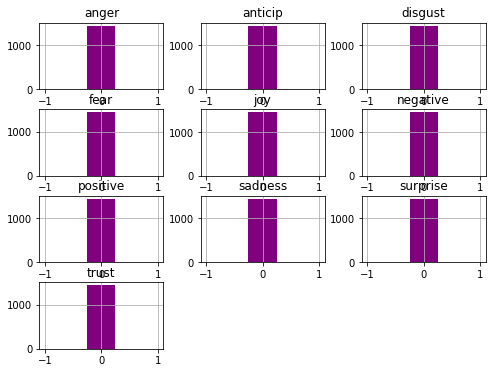

In [43]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
my_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on #vaccinecauseaids")
plt.show()

## Part 6: Analyzing individual datasets
To get a better sense if every dataset provides such neutral emotions we use NRCLex to identify the emotions in each of our dataset individually. 

In [18]:
vaccinesKill_data = pd.read_csv('vaccineskill_twitter_data.csv')

info_df = []
for tweet in vaccinesKill_data['text']: 
    text_object = NRCLex(tweet)
    info = (tweet, text_object.affect_frequencies['fear'], 
            text_object.affect_frequencies['anger'], text_object.affect_frequencies['anticip'],
            text_object.affect_frequencies['trust'], text_object.affect_frequencies['surprise'],
            text_object.affect_frequencies['positive'], text_object.affect_frequencies['negative'],            text_object.affect_frequencies['sadness'], text_object.affect_frequencies['disgust'],
            text_object.affect_frequencies['joy']
               )
    info_df.append(info)
    #print(text_object.affect_frequencies)
    
vk_df = pd.DataFrame(info_df)
vk_df.columns = ["tweet", "fear", "anger", "anticip", "trust", "surprise", "positive", "negative", "sadness", "disgust","joy" ]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


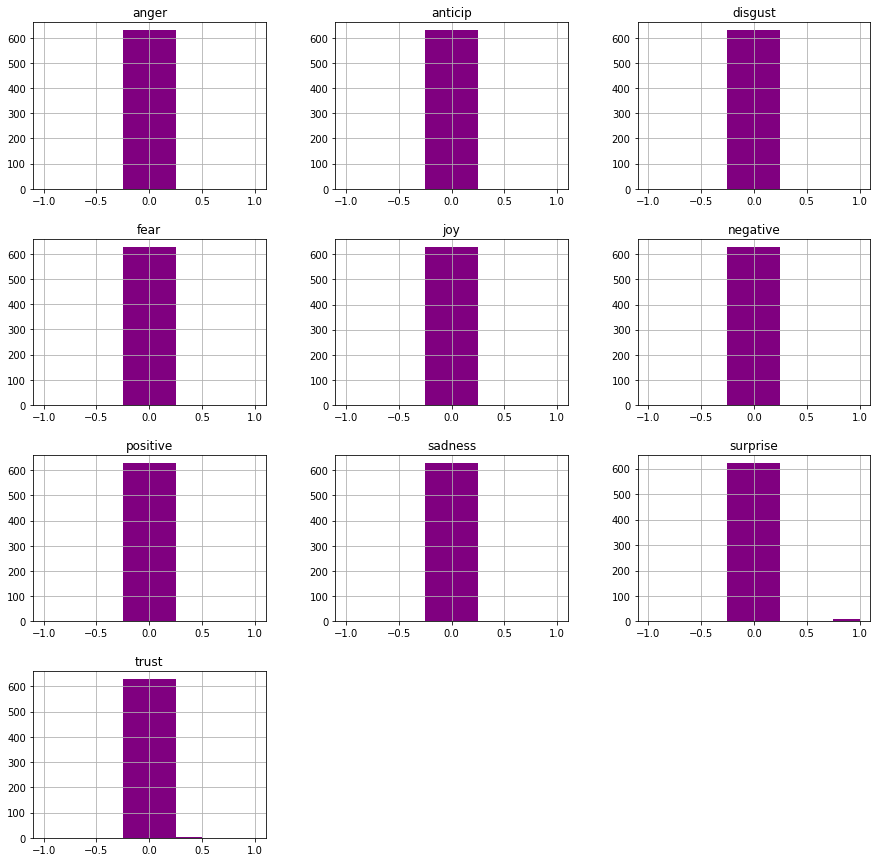

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot histogram of the polarity values
vk_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on #vaccinecauseaids")
plt.show()

In [22]:
vaccinesPoison_data = pd.read_csv('vaccinesarepoison_twitter_data.csv')

In [27]:
freqCount = vaccinesPoison_data['username'].value_counts() # counts the frequency of each username
freqCount

Patriot___News     8
bridb              6
_LibertyReport_    4
bois0917           4
Pythago38919500    4
                  ..
Elle_G_Lewis       2
MyNameIsEarlB      2
kate_niicole       2
SabrinaRWilhelm    2
poopy1984          2
Name: username, Length: 300, dtype: int64

In [36]:
vaccinesPoison_data.loc[1:10, ]
vaccinesPoison_data.sort_values('totaltweets').tail() # examine the users with the most tweets 

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
438,aspeed,Rainbow Book Award winning writer. A small med...,In the crawlspace,3541,1971,320829,2008-03-16 07:27:52,2020-09-18 21:11:59,2,"Welp, just saw a dude with a “Vaccines are poi...",[]
241,fangpusskins,"Wake county substitute/math teacher, bleeding ...",NaN,4991,3650,347374,2010-08-05 00:40:26,2020-09-15 15:56:26,1,@bariweiss I have unapologetically ended frien...,[]
557,fangpusskins,"Wake county substitute/math teacher, bleeding ...",NaN,4991,3650,347374,2010-08-05 00:40:26,2020-09-15 15:56:26,1,@bariweiss I have unapologetically ended frien...,[]
607,scarijuana,The idea is to participate in your existence. ...,Colorado ☥ Ⓥ,432,7303,433955,2009-09-21 01:05:45,2020-09-13 13:30:16,3,All vaccines should be banned! They are all fi...,[]
291,scarijuana,The idea is to participate in your existence. ...,Colorado ☥ Ⓥ,432,7303,433955,2009-09-21 01:05:45,2020-09-13 13:30:16,3,All vaccines should be banned! They are all fi...,[]


In [ ]:
for user in 
print(vaccinesPoison_data['totaltweets'] 

In [23]:
info_df = []
for tweet in vaccinesPoison_data['text']: 
    text_object = NRCLex(tweet)
    info = (tweet, text_object.affect_frequencies['fear'], 
            text_object.affect_frequencies['anger'], text_object.affect_frequencies['anticip'],
            text_object.affect_frequencies['trust'], text_object.affect_frequencies['surprise'],
            text_object.affect_frequencies['positive'], text_object.affect_frequencies['negative'],            text_object.affect_frequencies['sadness'], text_object.affect_frequencies['disgust'],
            text_object.affect_frequencies['joy']
               )
    info_df.append(info)
    #print(text_object.affect_frequencies)
    
vp_df = pd.DataFrame(info_df)
vp_df.columns = ["tweet", "fear", "anger", "anticip", "trust", "surprise", "positive", "negative", "sadness", "disgust","joy" ]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


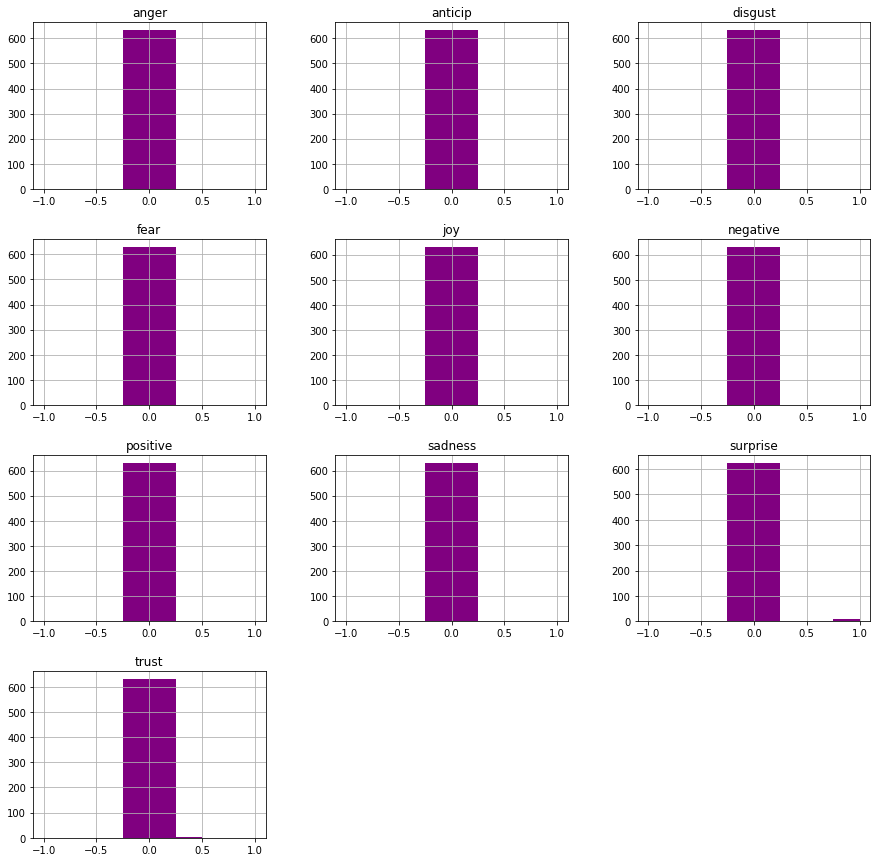

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot histogram of the polarity values
vp_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on #vaccinecauseaids")
plt.show()